In [53]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [54]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [55]:
def split(row) :
    r = []
    for i in range(3,10) : r.append(row[i])
    return (int(row[2])+100*(int(row[1])+10*int(row[0])), np.array(r),[int(row[11]),int(row[13])])
types = []
types += 3*[int] +8*[float] + 2*[int,float]
f90 = open("clusterShapeMinBias90Kall.par", "r").readlines()
pcsf = np.genfromtxt(f90)

#f451 = open("viCalib45K_1.par", "r").readlines()
f451 = open("clusterShapeMinBias90Kall.par", "r").readlines()
#f451 = open("viCalib90K_noside.par", "r").readlines()
#f451 = open("pixelShape.par", "r").readlines()
#f451 = open("viCalibK0.par", "r").readlines()
pcsf1 = np.genfromtxt(f451) #,dtype=types)
map1 = {}
for r in pcsf1 :
    i,c,n = split(r)
    map1[i]=(c,n)
#print map1[111]

#f452 = open("viCalib45K_2.par", "r").readlines()
f452 = open("clusterShapeMinBias90KnoL1.par", "r").readlines()
#f452 = open("viCalibAllMu.par", "r").readlines()
#f452 = open("viCalibK0.par", "r").readlines()
#f452 = open("viCalib90K_tkreco.par", "r").readlines()
#f452 = open("pixelShape.par", "r").readlines()
map2 = {}
pcsf2 = np.genfromtxt(f452) #,dtype=types)
for r in pcsf2 :
    i,c,n = split(r)
    map2[i]=(c,n)
#xy1 = np.genfromtxt(f451, usecols=(3,4,5,6,7,8,9,10))
#xy2 = np.genfromtxt(f452, usecols=(3,4,5,6,7,8,9,10))
#for r in pcsf :
#    if r[2]==0 : print r

In [56]:
def ylim(row) :
    return (min(row[5],-row[10]),max(row[6],-row[9]))
def xlim(row) :
    return (min(row[3],-row[8]),max(row[4],-row[7]))


In [57]:
for r in pcsf :
 print r[2],ylim(r)

0.0 (0.0, 3.56555)
1.0 (0.0017141700000000001, 4.51396)
2.0 (1.1005400000000001, 5.6950700000000003)
3.0 (2.10242, 7.1640199999999998)
4.0 (3.0990600000000001, 9.3615200000000005)
5.0 (4.1028799999999999, 11.978300000000001)
6.0 (5.1321500000000002, 13.196999999999999)
7.0 (6.1030199999999999, 15.1755)
8.0 (7.1983499999999996, 16.146899999999999)
9.0 (8.1028400000000005, 16.478400000000001)
10.0 (9.2007700000000003, 16.202500000000001)
11.0 (10.176500000000001, 15.597200000000001)
12.0 (11.2026, 15.8954)
13.0 (12.200900000000001, 16.645800000000001)
14.0 (13.0115, 16.6297)
15.0 (14.258800000000001, 16.5215)
0.0 (-2.4713099999999999, 2.3032300000000001)
1.0 (-1.3997200000000001, 3.6041599999999998)
2.0 (1.09209, 5.4760299999999997)
3.0 (2.0971899999999999, 5.8353099999999998)
4.0 (3.1015799999999998, 7.2803699999999996)
5.0 (4.1072800000000003, 9.7309099999999997)
6.0 (5.1102999999999996, 11.8422)
7.0 (6.1100899999999996, 13.3148)
8.0 (7.1055200000000003, 14.7485)
9.0 (8.111800000000000

In [100]:
def ploty(ax,pcsf,col='b',barrel=0) :
    for r in pcsf :
        if (r[0]!=barrel) : continue
        x = []
        y = []
        x.append(r[2])
        x.append(r[2])
        x.append(r[2]+1)
        x.append(r[2]+1)
        l = ylim(r)
        y.append(l[0])
        y.append(l[1])
        y.append(l[1])
        y.append(l[0])
        ax.fill(y, x, col,alpha=0.2)
    ax.set_xlabel('predicted y size',fontsize=14)
    ax.set_ylabel('measured x size',fontsize=14)

def plotx(ax,pcsf,col='b',barrel=0) :
    for r in pcsf :
        if (r[0]!=barrel) : continue
        x = []
        y = []
        x.append(r[1])
        x.append(r[1])
        x.append(r[1]+1)
        x.append(r[1]+1)
        l = xlim(r)
        y.append(l[0])
        y.append(l[1])
        y.append(l[1])
        y.append(l[0])
        ax.fill(y, x, col,alpha=0.2)
    ax.set_xlabel('predicted x size',fontsize=14)
    ax.set_ylabel('measured x size',fontsize=14)


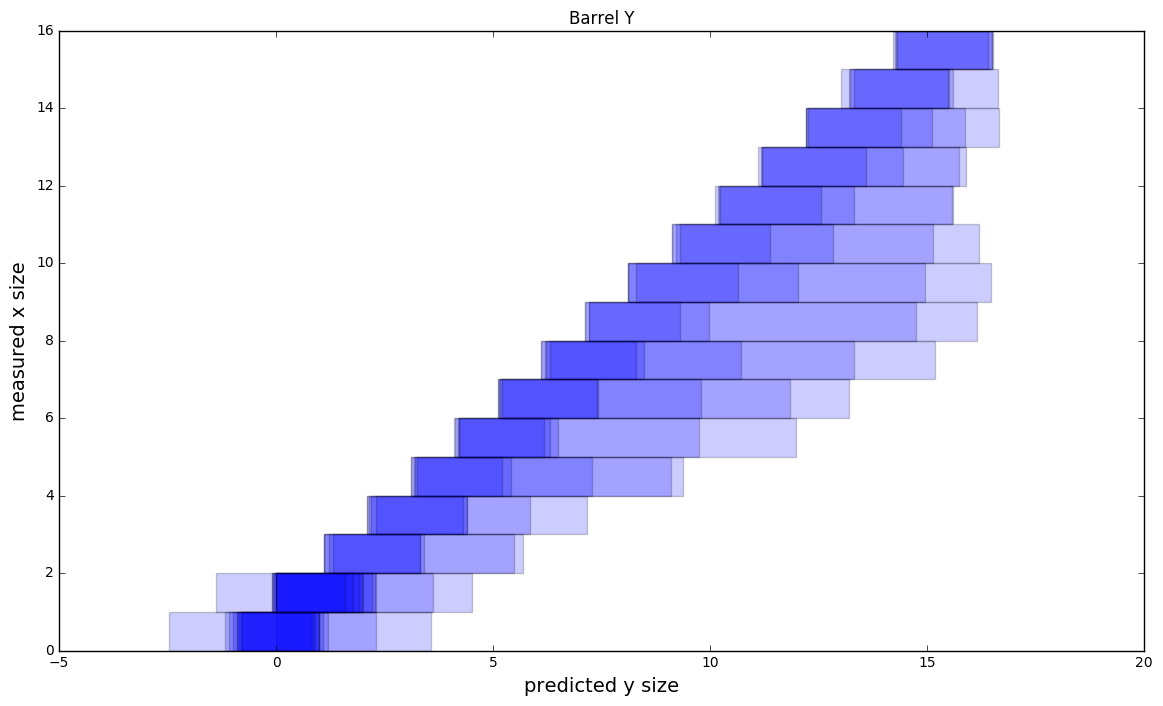

In [101]:
fig, ax = plt.subplots(figsize=(14, 8))
ploty(ax,pcsf,'b',0)
ax.set_title('Barrel Y')
plt.show()

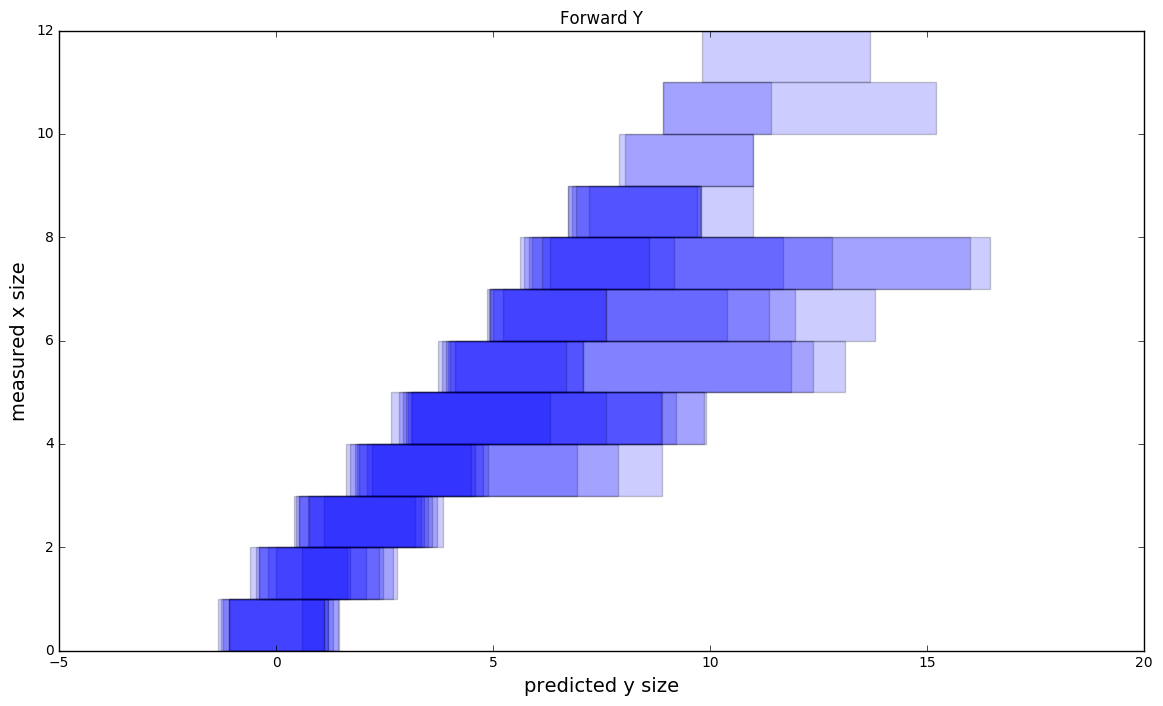

In [102]:
fig, ax = plt.subplots(figsize=(14, 8))
ploty(ax,pcsf,'b',1)
ax.set_title('Forward Y')
plt.show()

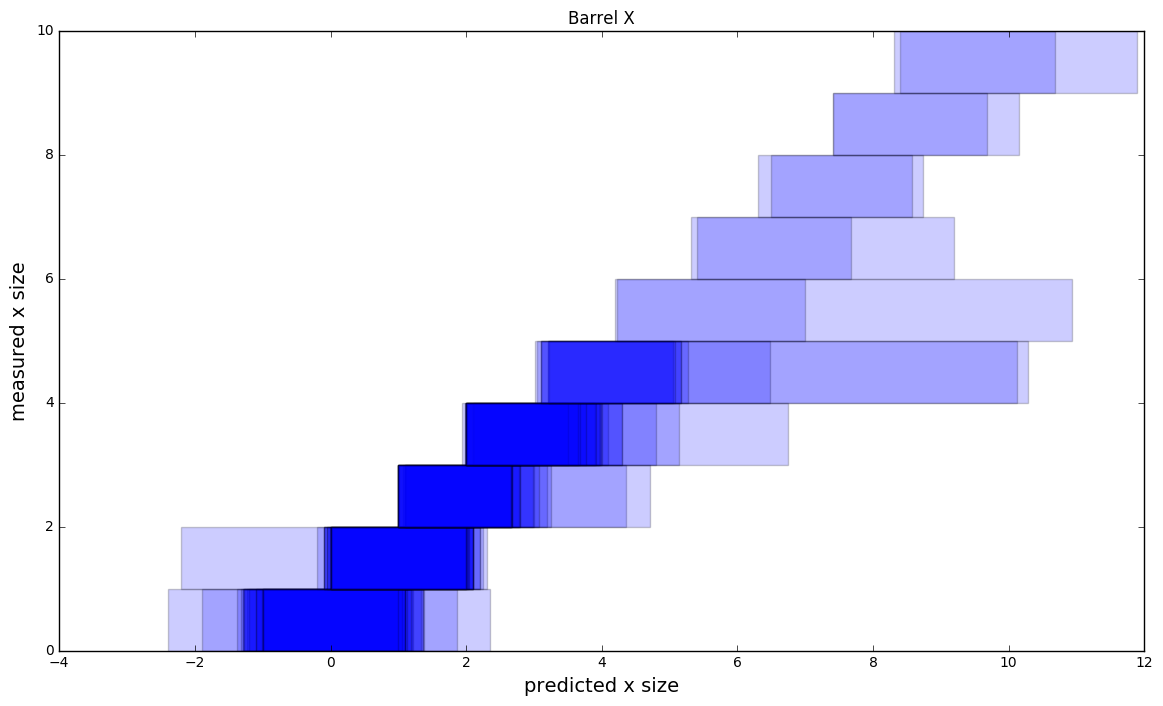

In [103]:
fig, ax = plt.subplots(figsize=(14, 8))
plotx(ax,pcsf,'b',0)
ax.set_title('Barrel X')
plt.show()

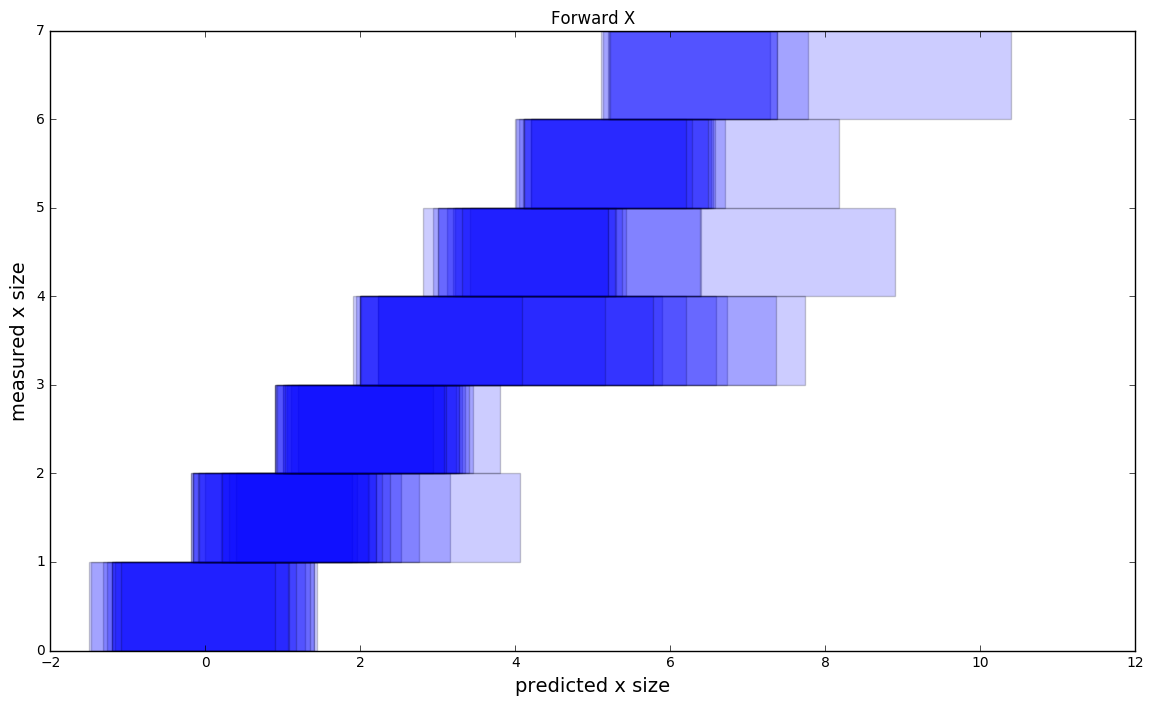

In [104]:
fig, ax = plt.subplots(figsize=(14, 8))
plotx(ax,pcsf,'b',1)
ax.set_title('Forward X')
plt.show()

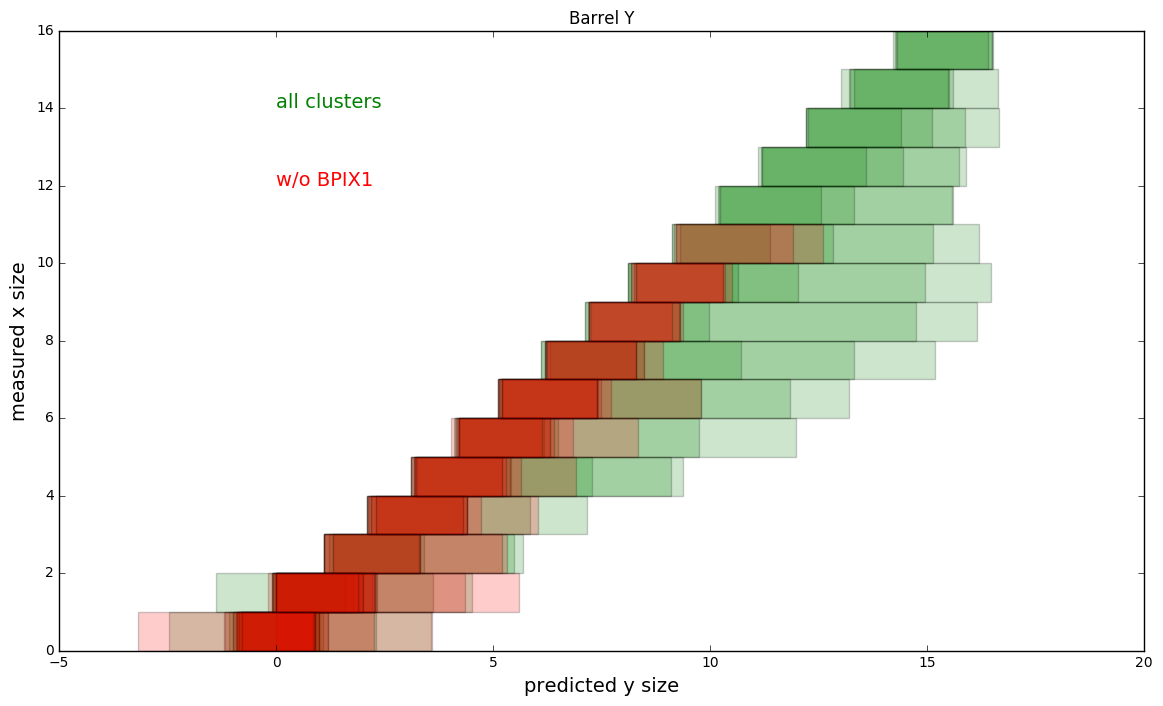

In [105]:
fig, ax = plt.subplots(figsize=(14, 8))
ploty(ax,pcsf1,'g',0)
ploty(ax,pcsf2,'r',0)
ax.set_title('Barrel Y')
ax.text(0, 14, 'all clusters',color='g',fontsize=14)
ax.text(0, 12, 'w/o BPIX1',color='r',fontsize=14)
plt.show()

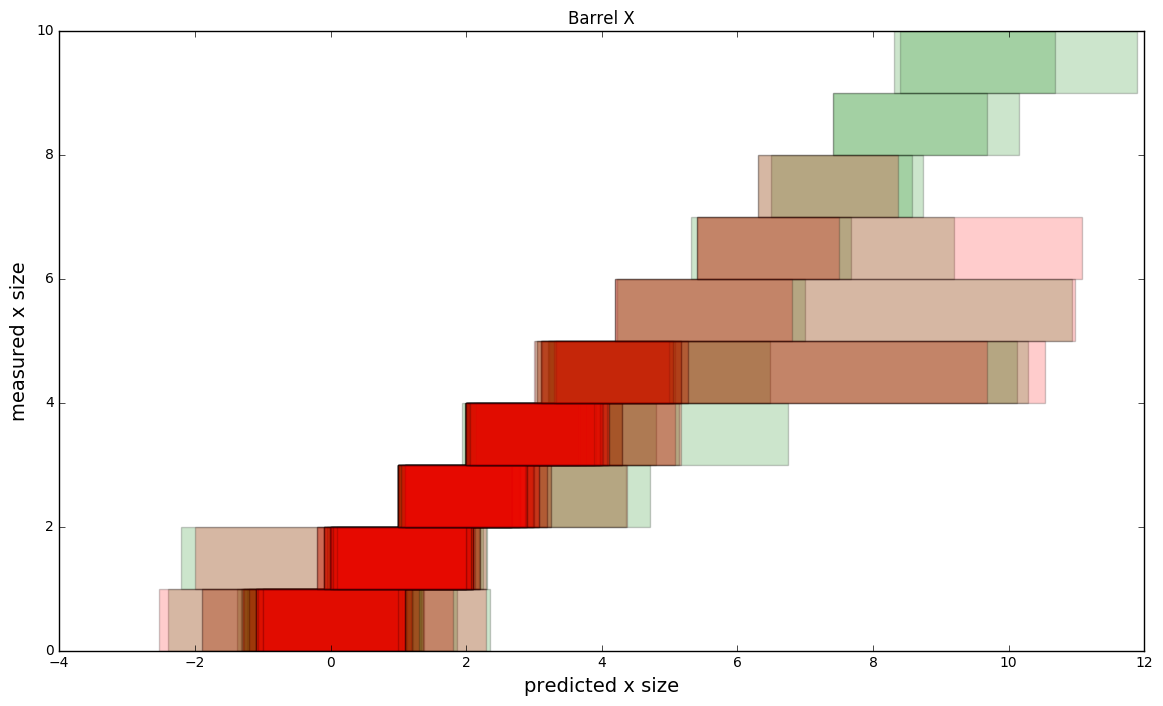

In [106]:
fig, ax = plt.subplots(figsize=(14, 8))
plotx(ax,pcsf1,'g',0)
plotx(ax,pcsf2,'r',0)
ax.set_title('Barrel X')
plt.show()

3 [ 0.050461 -0.00588  -0.00144  -1.13216   0.058117 -0.02567   1.20359 ] [3112, 3293] [3296, 3346]
3 [ 0.050461 -0.00588  -0.00144  -1.13216   0.058117 -0.02567   1.20359 ] [3112, 3293] [3296, 3346]
4 [ 0.010162 -0.10886   0.00313  -3.08253  -0.044705 -0.18037   2.30214 ] [1942, 1638] [1498, 1526]
4 [ 0.010162 -0.10886   0.00313  -3.08253  -0.044705 -0.18037   2.30214 ] [1942, 1638] [1498, 1526]
5 [ 0.083755 -0.2295   -0.0794   -5.13733   0.111318 -0.1916    4.57214 ] [1160, 1333] [707, 807]
5 [ 0.083755 -0.2295   -0.0794   -5.13733   0.111318 -0.1916    4.57214 ] [1160, 1333] [707, 807]
6 [ 0.037792 -0.28313   0.06848  -5.74361   0.007536 -0.18186   5.06985 ] [850, 792] [487, 577]
6 [ 0.037792 -0.28313   0.06848  -5.74361   0.007536 -0.18186   5.06985 ] [850, 792] [487, 577]
7 [-0.063356 -0.26894   0.19705  -6.77911  -0.040049 -0.09972   6.23528 ] [528, 475] [332, 368]
7 [-0.063356 -0.26894   0.19705  -6.77911  -0.040049 -0.09972   6.23528 ] [528, 475] [332, 368]
8 [ -1.73400000e-03 

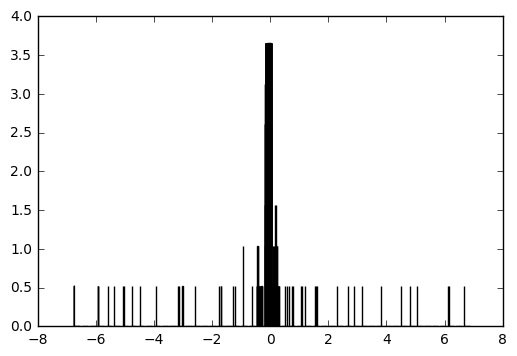

In [107]:
dxy = []
for k in map1.keys() :
    if k in map2.keys() :
        d = map2[k][0]-map1[k][0]
        if (max(d)<100 and min(d)>-100) :
            dxy.append(d)
            if max(d) >1 : print k,d,map2[k][1],map1[k][1]
            if min(d) <-1 : print k,d,map2[k][1],map1[k][1]
plt.hist(dxy,bins=50, normed=1)
plt.show()